# BIKE RENTING

In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
# Set working directory
os.chdir("C:/Users/aksha/Desktop/project 2 bike renting")

In [3]:
# Checking current  working directory
os.getcwd()

'C:\\Users\\aksha\\Desktop\\project 2 bike renting'

In [16]:
# Load Data training data
bikerental_train = pd.read_csv('day.csv')

# EXPLORATORY DATA ANALYSIS

In [17]:
# Checking the shape of Data
bikerental_train.shape

(731, 16)

In [18]:
# Checking the info of the Dataset
bikerental_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [19]:
type(bikerental_train)

pandas.core.frame.DataFrame

In [20]:
bikerental_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
bikerental_train.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# DATA PREPROCESSING

In [22]:
# Checking the missing value in the DataFrame
missing_val = pd.DataFrame(bikerental_train.isnull().sum())

In [23]:
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [24]:
# So there is no missing value since the sum of missing value column is 0
missing_val[0].sum()

0

In [13]:
## Outlier Analysis
#df = bikerental_train.copy()

In [25]:
# Seperating Numeric and Categorical variables
cat_names = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [26]:
cont_names = ["temp","atemp","hum","windspeed","casual","registered","cnt"]

{'whiskers': [<matplotlib.lines.Line2D at 0x20d2368b710>,
 'caps': [<matplotlib.lines.Line2D at 0x20d2368bda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d2368b2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x20d2369e470>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d2369e7b8>],
 'means': []}

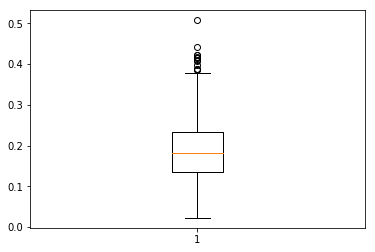

In [27]:
# Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(bikerental_train['windspeed'])
# Similiar Boxplots can be plotted for other variables too

{'whiskers': [<matplotlib.lines.Line2D at 0x20d2371a358>,
 'caps': [<matplotlib.lines.Line2D at 0x20d2371aa20>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d2370ef28>],
 'medians': [<matplotlib.lines.Line2D at 0x20d2371ae48>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d23721438>],
 'means': []}

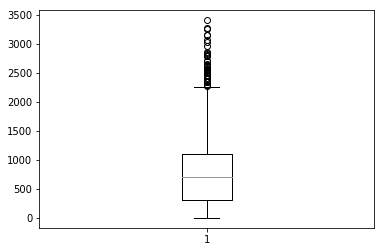

In [28]:
%matplotlib inline  
plt.boxplot(bikerental_train['casual'])

In [ ]:
# Since some variables contains outliers so we remove them to make our dataset free from outliers

In [29]:
for i in cont_names:
    q75, q25 = np.percentile(bikerental_train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
     #print(min)
     #print(max)
    
    bikerental_train = bikerental_train.drop(bikerental_train[bikerental_train.loc[:,i] < min].index)
    bikerental_train = bikerental_train.drop(bikerental_train[bikerental_train.loc[:,i] > max].index)

In [30]:
# Checking again the shape of Dataset after removing outliers
bikerental_train.shape

(676, 16)

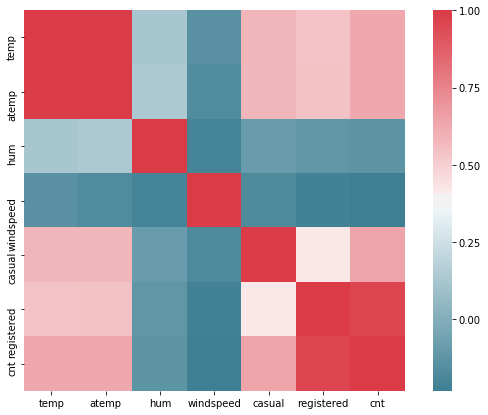

In [31]:
## Feature Selection

# Correlation analysis for continuous variables of Dataset bikerental_train
# Generate Correlation Matrix
df_corr = bikerental_train.loc[:,cont_names]

# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 7))

#Generate correlation matrix
corr = df_corr.corr()

# Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [32]:
# Chisquare test of independence for Feature selection of categorical variables
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bikerental_train['cnt'], bikerental_train[i]))
    print(p)
    print(chi2)

season
0.5306886312713439
1935.5406851974467
yr
0.41642366315035007
653.9505912903113
mnth
0.4756091821561145
7123.63422651725
holiday
0.7870836122582522
618.1256332320162
weekday
0.43936502670720573
3894.7918367993575
workingday
0.504633411642988
645.9159973666887
weathersit
0.5464467453059881
1287.4080042127434


In [33]:
# Remove those variables which contain redundant information
bikerental_train = bikerental_train.drop(["atemp"], axis=1)

In [34]:
# Now we are left with 15 variables
bikerental_train.shape

(676, 15)

In [24]:
## Feature Scaling
#df = bikerental_train.copy()

(array([  4.,  31.,  61., 104.,  79.,  69.,  75.,  70.,  84.,  81.,  18.]),
 array([0.0591304 , 0.13208827, 0.20504615, 0.27800402, 0.35096189,
        0.42391976, 0.49687764, 0.56983551, 0.64279338, 0.71575125,
        0.78870913, 0.861667  ]),
 <a list of 11 Patch objects>)

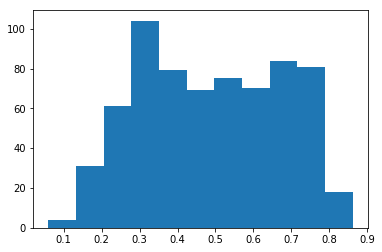

In [35]:
# Normality check
%matplotlib inline  
plt.hist(bikerental_train["temp"], bins='auto')

(array([ 9.,  5., 24., 37., 74., 64., 79., 71., 79., 77., 54., 42., 29.,
        24.,  8.]),
 array([0.275833  , 0.32227747, 0.36872193, 0.4151664 , 0.46161087,
        0.50805533, 0.5544998 , 0.60094427, 0.64738873, 0.6938332 ,
        0.74027767, 0.78672213, 0.8331666 , 0.87961107, 0.92605553,
        0.9725    ]),
 <a list of 15 Patch objects>)

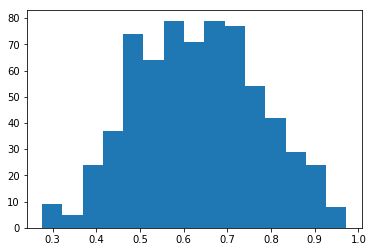

In [36]:
plt.hist(bikerental_train["hum"], bins='auto')

(array([ 2., 16., 29., 33., 64., 78., 83., 79., 58., 68., 50., 27., 25.,
        23., 11., 19., 11.]),
 array([0.0223917 , 0.04331619, 0.06424068, 0.08516516, 0.10608965,
        0.12701414, 0.14793863, 0.16886312, 0.18978761, 0.21071209,
        0.23163658, 0.25256107, 0.27348556, 0.29441005, 0.31533454,
        0.33625902, 0.35718351, 0.378108  ]),
 <a list of 17 Patch objects>)

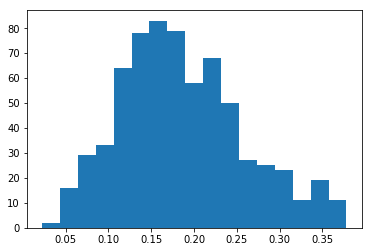

In [25]:
plt.hist(bikerental_train["windspeed"], bins='auto')

In [ ]:
# Since by checking different variables we come to know that our continuous variables data is not Normally distributed so we are going to use Normalization method of Feature Scaling

In [26]:
cont_names = ["temp","hum","windspeed","casual","registered","cnt"]

In [27]:
# Nomalisation
for i in cont_names:
    #print(i)
    bikerental_train[i] = (bikerental_train[i] - np.min(bikerental_train[i]))/(np.max(bikerental_train[i]) - np.min(bikerental_train[i]))

In [28]:
bikerental_train.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.355170,0.760765,0.388102,0.143106,0.091539,0.118145
1,2,2011-01-02,1,0,1,0,0,0,2,0.379232,0.603235,0.635752,0.056111,0.093849,0.095571
2,3,2011-01-03,1,0,1,0,1,1,1,0.171000,0.231732,0.635105,0.051327,0.174560,0.162802
3,4,2011-01-04,1,0,1,0,2,1,1,0.175530,0.451582,0.387681,0.046107,0.207046,0.188934
4,5,2011-01-05,1,0,1,0,3,1,1,0.209120,0.231278,0.462471,0.034798,0.216286,0.193596


In [29]:
bikerental_train.describe()
# Max and Min values of continuous variables lies between 0-1 as can be seen below

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,358.355030,2.505917,0.476331,6.559172,0.026627,2.958580,0.724852,1.405325,0.536334,0.512844,0.461996,0.323542,0.521044,0.533993
std,212.140732,1.122812,0.499809,3.504206,0.161111,1.933272,0.446919,0.548318,0.230440,0.201286,0.203450,0.231392,0.227602,0.228557
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.750000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.336479,0.357740,0.314254,0.131688,0.355436,0.373973
50%,349.500000,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.526501,0.510168,0.438803,0.297086,0.519131,0.539198
75%,545.250000,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.740665,0.658493,0.585878,0.448782,0.675173,0.689547
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MODEL DEVELOPMENT

In [30]:
# Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [31]:
# Divide data into train and test for model Development
X = bikerental_train.values[:, 2:14]
Y = bikerental_train.values[:,14]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [33]:
## DECISION TREE

In [34]:
# Model Development
DT_model = tree.DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)

In [35]:
# Predict new test cases
predictions_DT = DT_model.predict(X_test)

In [36]:
# Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_DT))
MAPE = metrics.mean_absolute_error(y_test, predictions_DT)
print("MAPE:", MAPE*100)
print('MSE:', metrics.mean_squared_error(y_test, predictions_DT))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_DT)))

MAE: 0.07036987233970424
MAPE: 7.036987233970423
MSE: 0.007595192680135665
RMSE: 0.08715040263897618


In [ ]:
# MAE for Decision tree = 0.07285
# MAPE for Decision tree = 7.285%
# MSE for Decision tree = 0.00713
# RMSE for Decision tree = 0.0844

In [ ]:
## RANDOM FOREST

In [37]:
# Import Libraries
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Develop and train random forest model
RF_model = RandomForestRegressor(n_estimators = 10).fit(X_train, y_train)

In [39]:
# Predict new test cases
RF_Predictions = RF_model.predict(X_test)

In [40]:
# Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, RF_Predictions))
MAPE = metrics.mean_absolute_error(y_test, RF_Predictions)
print("MAPE:", MAPE*100)
print('MSE:', metrics.mean_squared_error(y_test, RF_Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_Predictions)))

MAE: 0.009257044125465179
MAPE: 0.9257044125465179
MSE: 0.00015721842294291025
RMSE: 0.01253867708105246


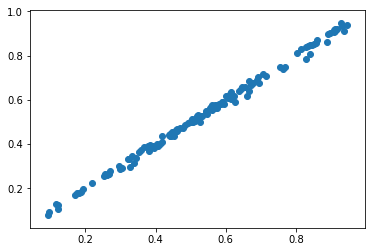

In [41]:
plt.scatter(y_test,RF_Predictions)

In [ ]:
# MAE for Random Forest = 0.009257
# MAPE for Random Forest = 0.9257%
# MSE for Random Forest = 0.0002834
# RMSE for Random Forest = 0.01683

In [ ]:
## LINEAR REGRESSION

In [42]:
# Import libraries for LR
from sklearn.linear_model import LinearRegression

In [43]:
# Train the model using the training sets
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Predict the test cases using Linear Regression model
LR_predictions = lm.predict(X_test)

In [45]:
# Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, LR_predictions))
MAPE = metrics.mean_absolute_error(y_test, LR_predictions)
print("MAPE:", MAPE*100)
print('MSE:', metrics.mean_squared_error(y_test, LR_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, LR_predictions)))

MAE: 4.920492118329508e-16
MAPE: 4.920492118329508e-14
MSE: 3.458573665130925e-31
RMSE: 5.880963921952697e-16


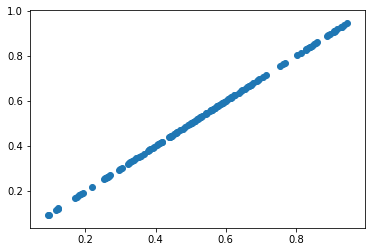

In [46]:
plt.scatter(y_test,LR_predictions)

In [ ]:
# MAE for Linear Regression = 1.32951e-15
# MAPE for Linear Regression = 1.32951e-13
# MSE for Linear Regression = 2.59827e-30
# RMSE for Linear Regression = 1.61191e-15

In [ ]:
#KNN K NEAREST NEIGHBOUR

In [47]:
# Import libraries
from sklearn.neighbors import KNeighborsRegressor

In [48]:
# Train KNN model
KNN_model = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)

In [49]:
# Predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [50]:
# Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, KNN_Predictions))
MAPE = metrics.mean_absolute_error(y_test, KNN_Predictions)
print("MAPE:", MAPE*100)
print('MSE:', metrics.mean_squared_error(y_test, KNN_Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, KNN_Predictions)))

MAE: 0.06183711369469882
MAPE: 6.183711369469882
MSE: 0.007952439185496499
RMSE: 0.08917644972466945


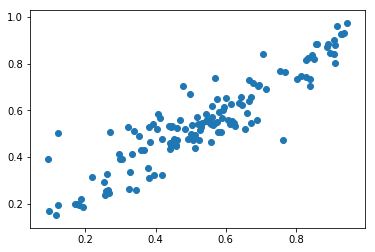

In [51]:
plt.scatter(y_test,KNN_Predictions)

In [ ]:
# MAE for KNN Regression = 0.07225
# MAPE for KNN Regression = 7.2257%
# MSE for KNN Regression = 0.009388
# RMSE for KNN Regression = 0.09689

In [ ]:
# SUMMARY

# DECISION TREE
# MAE for Decision tree = 0.07285
# MAPE for Decision tree = 7.285%
# MSE for Decision tree = 0.00713
# RMSE for Decision tree = 0.0844

# RANDOM FOREST
# MAE for Random Forest = 0.01188
# MAPE for Random Forest = 1.188%
# MSE for Random Forest = 0.0002834
# RMSE for Random Forest = 0.01683

# LINEAR REGRESSION
# MAE for Linear Regression = 1.32951e-15
# MAPE for Linear Regression = 1.32951e-13
# MSE for Linear Regression = 2.59827e-30
# RMSE for Linear Regression = 1.61191e-15

# KNN K NEAREST NEIGHBOUR
# MAE for KNN Regression = 0.07225
# MAPE for KNN Regression = 7.2257%
# MSE for KNN Regression = 0.009388
# RMSE for KNN Regression = 0.09689

# PREDICT TARGET VARIABLE

In [ ]:
# Now since we have tested all the Machine Learning Algorithms on our Training Data and retrieved the accuracy from each model 
# Let us create example output with sample input

In [53]:
## Simple random sampling
# Creating sample input data to test our Machine Learning Algorithm
sample_bikerenting = bikerental_train.sample(500)

In [54]:
sample_bikerenting.shape

(500, 15)

In [55]:
sample_bikerenting.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
37,38,2011-02-07,1,0,2,0,1,1,1,0.264831,0.663875,0.064705,0.051327,0.226971,0.207337
345,346,2011-12-12,4,0,12,0,1,1,1,0.223295,0.566985,0.115424,0.061331,0.454375,0.403386
442,443,2012-03-18,1,1,3,0,0,0,2,0.515079,0.766747,0.293749,0.959113,0.529165,0.720157
239,240,2011-08-28,3,0,8,0,0,0,1,0.807351,0.410429,0.793518,0.614615,0.418568,0.529015
225,226,2011-08-14,3,0,8,0,0,0,2,0.769481,0.777512,0.562924,0.581122,0.355472,0.465955


In [57]:
# Drop the "instant", "dteday", "atemp" column from the Dataset as our model is not trained for it
sample_bikerenting = sample_bikerenting.drop(["instant", "dteday",], axis=1)

In [58]:
sample_bikerenting.shape

(500, 13)

In [59]:
# Drop "cnt" column as well as we need to predict its value using sample data by applying ML algorithms on top of it
sample_bikerenting = sample_bikerenting.drop(["cnt"], axis=1)

In [60]:
sample_bikerenting.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
37,1,0,2,0,1,1,1,0.264831,0.663875,0.064705,0.051327,0.226971
345,4,0,12,0,1,1,1,0.223295,0.566985,0.115424,0.061331,0.454375
442,1,1,3,0,0,0,2,0.515079,0.766747,0.293749,0.959113,0.529165
239,3,0,8,0,0,0,1,0.807351,0.410429,0.793518,0.614615,0.418568
225,3,0,8,0,0,0,2,0.769481,0.777512,0.562924,0.581122,0.355472


In [ ]:
# Now we apply our model to Linear Regression to predict our target variable "cnt"

In [61]:
sample_bikerenting["cnt_pred"] = lm.predict(sample_bikerenting)

In [62]:
sample_bikerenting.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt_pred
37,1,0,2,0,1,1,1,0.264831,0.663875,0.064705,0.051327,0.226971,0.207337
345,4,0,12,0,1,1,1,0.223295,0.566985,0.115424,0.061331,0.454375,0.403386
442,1,1,3,0,0,0,2,0.515079,0.766747,0.293749,0.959113,0.529165,0.720157
239,3,0,8,0,0,0,1,0.807351,0.410429,0.793518,0.614615,0.418568,0.529015
225,3,0,8,0,0,0,2,0.769481,0.777512,0.562924,0.581122,0.355472,0.465955


In [ ]:
# Our 'cnt_pred' column gets added to as the last column of the dataset

In [63]:
# Now writing this new dataset with predicted variable as a CSV file
sample_bikerenting.to_csv('sample_bike_predict.csv',index=False)

# THANKYOU